In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

df = pd.read_csv('diabetes2.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [55]:
df.isnull().sum()

#check for empty values 

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [56]:
X = df.drop(['Outcome'], axis = 1)
y = df['Outcome']



In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

#selecting training and testing data, and transforming the independent variables to scale them and prevent certain variables skewing the outcome 


In [58]:
log_reg = LogisticRegression(random_state = 0).fit(X_train_scaled, y_train)

In [59]:
log_reg.score(X_train_scaled, y_train)

0.7746741154562383

In [60]:
log_reg.score(X_test_scaled, y_test)

0.7792207792207793

The model score is acceptable/good, and can be improved further 

In [61]:
rf = RandomForestClassifier(n_estimators = 50)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

In [62]:
y_pred = rf.predict(X_test)

rf.score(X_test, y_test)



0.7835497835497836

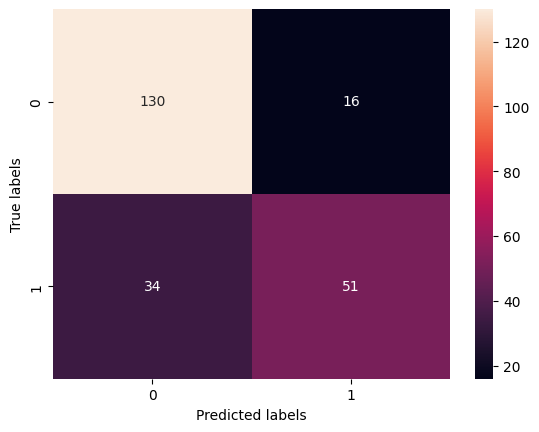

In [63]:
cm = confusion_matrix(y_test, y_pred)

ax = sns.heatmap(cm, annot = True, fmt='g')
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
#creating confusion matrix to visually assess performance of random forest model